##### https://docs.scipy.org/doc/scipy/reference/signal.html

In [110]:
import pandas as pd
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import signal
from scipy.signal import butter, lfilter, freqz

In [111]:
def open_csv(filePath1,exerciseNames):
    df = pd.read_csv(filePath1)
    df.head()
    return df,exerciseNames

In [112]:
# Upsamples the values to 1280.
def resamples(x, y,z,x1,y1,z1,t1,i1,r1): #,t1,i1,r1
    gry_z = signal.resample(z, 1280)#HandFlip["Gyr(z) "]
    #debug..
    #print(gry_z.shape)
    gry_y = signal.resample(y, 1280) #HandFlip["Gyr(y)"]
    #debug..
    #print(gry_y.shape)
    gry_x = signal.resample(x, 1280) # HandFlip["Gyr(x)"]
    
    acc_z = signal.resample(z1, 1280) #HandFlip["Gyr(z) "]
    #debug..
    #print(gry_z.shape)
    acc_y = signal.resample(y1, 1280) #HandFlip["Gyr(y)"]
    #debug..
    #print(gry_y.shape)
    acc_x = signal.resample(x1, 1280) # HandFlip["Gyr(x)"]
    #debug..
    #print(gry_x.shape)
    thumb = signal.resample(t1, 1280)
#     print(thumb.shape)
    index = signal.resample(i1, 1280)
#     print(index.shape)
    ring =  signal.resample(r1, 1280)
#     print(ring.shape)

    return gry_x,gry_y,gry_z,acc_x,acc_y,acc_z,thumb,index,ring

In [113]:
#plots gyroscope values of  x,y,z coordinates.
def plot_gyro(df,exerciseNames,mode,save_file_path,gry_x,gry_y,gry_z):
    lists = []
    k =0
    for i in range(gry_x.shape[0]):
        lists.append(i)
    #Debug
    # print(lists)
    #stats.zscore(gry_x,ddof = df.shape[0]-1)
    plt.plot(lists, gry_x ,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " "+exerciseNames + " exercise Gyr X",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_x_" + mode + "_" + exerciseNames)
    plt.show()
   #stats.zscore(gry_y,ddof = df.shape[0]-1)
    plt.plot(lists, gry_y ,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in y direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Gyr y",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_y_" + mode + "_" + exerciseNames)

    plt.show()
    #stats.zscore(gry_z,ddof = df.shape[0]-1)
    plt.plot(lists, gry_z ,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Gyr z",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_z_" + mode + "_" + exerciseNames)
    plt.show()


In [114]:
def flex_graphs(df,thumb,index,ring,mode,exerciseNames,save_file_path):
    lists1 = []
    k =0
    for i in range(thumb.shape[0]):
        lists1.append(i)
    plt.plot(lists1, index,color='blue',linestyle = "-",linewidth=0.5)#,marker='o'
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Index',color ="red")
    #plt.xlim(0, 566)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise - Full exercise 10 sec Index",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.grid(True)
    plt.savefig(save_file_path + "/" + "Index_" + mode + "_" + exerciseNames)
    plt.show()
    
    plt.plot(lists1, thumb,color='blue',linestyle = "-",linewidth=0.5)#marker='o'
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Thumb',color ="red")
    #plt.xlim(0, 566)
    plt.title(mode + " " + exerciseNames + "exercise - Full exercise 10 sec Thumb",fontsize=15, fontweight=4, color='black', y=1)
    plt.grid(True)
    plt.savefig(save_file_path + "/"  + "Thumb_" + mode + "_" + exerciseNames)
    plt.show()

In [115]:
def plot_acc(df,exerciseNames,mode,save_file_path,acc_x,acc_y,acc_z):
    lists1 = []
    k =0
    for i in range(acc_x.shape[0]):
        lists1.append(i)
    #print(lists)
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title(mode + " " + exerciseNames + " exercise Acceleration",fontsize=15, fontweight=4, color='black', y=1.02)
    ax.plot(acc_x, acc_y, acc_z, linewidth=0.5,color="blue")
    plt.savefig(save_file_path + "/" + "Acc_3d_" + mode + "_" + exerciseNames)    
    plt.show()
    plt.plot(lists1, acc_x,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Acceleration X",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_x_" + mode + "_" + exerciseNames)
    plt.show()
    plt.plot(lists1, acc_y,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in y direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Acceleration y",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_y_" + mode + "_" + exerciseNames)
    
    plt.show()
    
    plt.plot(lists1, acc_z,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in z direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames +" exercise Acceleration z",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_z_" + mode + "_" + exerciseNames)
    plt.show()

In [116]:
# Plots freq vs time graphs for using fourier transform.
def fourier_transform(df,exerciseNames,mode,save_file_path,df_fft):
    s = df_fft
    # Fourier transform.
    fourier = np.fft.fft(np.sin(s),n=df.shape[0],norm="ortho")
    Fs = 128 #Sampling rate.
    timestep = 1/Fs   #time delay for freq bins.
    # Frequency bins calulation.
    freq = np.fft.fftfreq(df.shape[0],d=timestep)
    plt.title(mode + " " + exerciseNames + " FFT")
    plt.xlabel("Frequencies",color="red")
    plt.ylabel(" Index",color="red")
    plt.grid(True)
    # Plots abs value fourier transform.
    plt.plot(abs(freq), abs(fourier.real)) #freq, sp.imag
    plt.savefig(save_file_path + "/" + "fft_index" + mode + "_" + exerciseNames)    
    plt.show()

In [117]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [118]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [119]:
def freq_response(b,a,fs):
    # Plot the frequency response.
    w, h = freqz(b, a, worN=8000)
    plt.subplot(2, 1, 1)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

In [120]:
def lowpass_filter_plots(index,t,y):
    plt.subplot(2, 1, 2)
    plt.plot(t, index, 'b-', label='data')
    plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
    plt.xlabel('Time [sec]')
    plt.grid()
    plt.legend()

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    

In [121]:
def main():
    filePath = "/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu/11_45_53_063_RIGHT_GLOVE_Finger_Tap.csv"#/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu_bitshift/14_19_12_052_RIGHT_GLOVE_Hand_Flip.csv" #"/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only_bitshift/14_23_17_857_RIGHT_GLOVE_Hand_Flip.csv"#"/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only/12_03_07_250_RIGHT_GLOVE_Hand_Flip.csv"
    save_file_path = "/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu/plots/FingerTap" #/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu_bitshift/plots" 
    mode = "FLEX+IMU"
    exerciseName = "FingerTap"
    df,exerciseNames = open_csv(filePath,exerciseName)
    #Debug
    #df.shape[0]
    gry_x,gry_y,gry_z,acc_x,acc_y,acc_z,thumb,index,ring = resamples(df["Gyr(x)"],df["Gyr(y)"],df["Gyr(z) "],df["Acc(x)"],df["Acc(y)"],df["Acc(z)"],df["Thumb"],df["Index"],df["Ring"])#''',df["Thumb"],df["Index"],df["Ring"]''' ,thumb,index,ring
    
    if mode=="FLEX+IMU":
        flex_graphs(df,thumb,index,ring,mode,exerciseName,save_file_path)
        
    plot_gyro(df,exerciseNames,mode,save_file_path,gry_x,gry_y,gry_z)
    
    plot_acc(df,exerciseNames,mode,save_file_path,acc_x,acc_y,acc_z)
    
    fourier_transform(df,exerciseNames,mode,save_file_path,index)

    # Filter requirements.
    order = 1
    fs = 128       # sample rate, Hz
    cutoff = 3.667  # desired cutoff frequency of the filter, Hz

    # Get the filter coefficients so we can check its frequency response.
    b, a = butter_lowpass(cutoff, fs, order)
    
    freq_response(b,a,fs)
    
    # Demonstrate the use of the filter.
    T = 10.0         # seconds
    n = 1280 # total number of samples
    t = np.linspace(0, T, n, endpoint=False)

    # Filter the data, and plot both the original and filtered signals.
    y = butter_lowpass_filter(index, cutoff, fs, order)
    
    # Make plots for filtered data.
    lowpass_filter_plots(index,t,y)

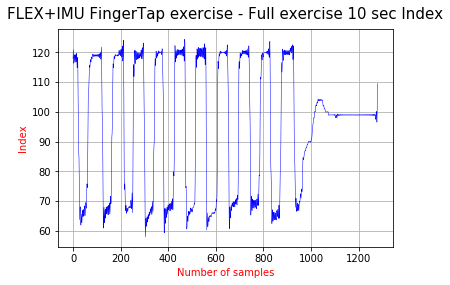

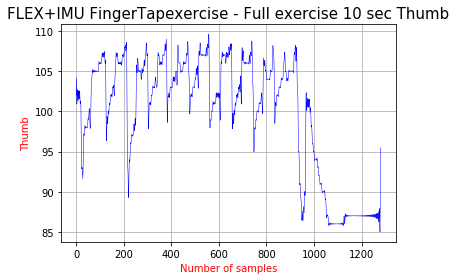

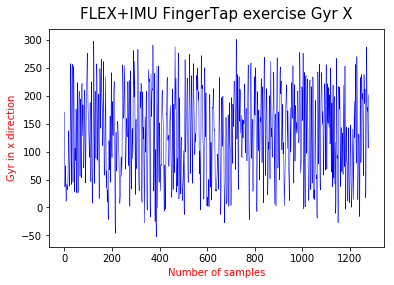

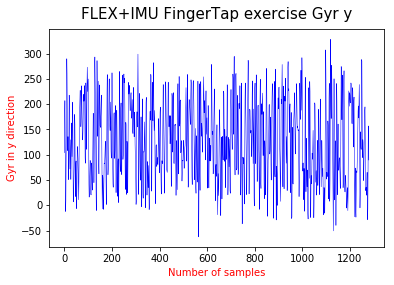

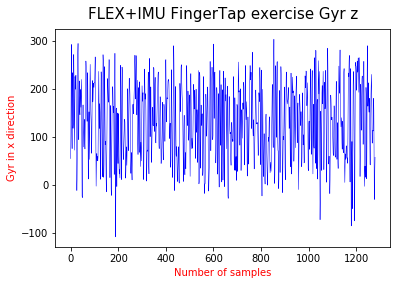

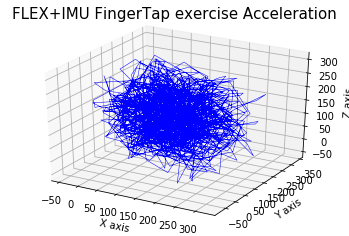

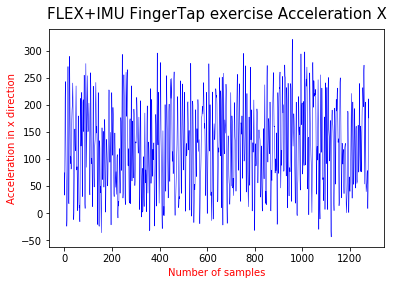

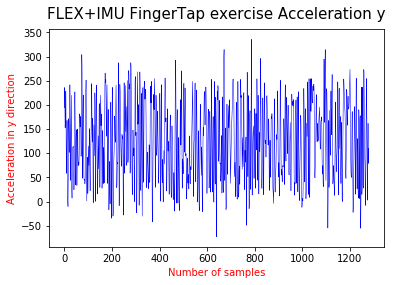

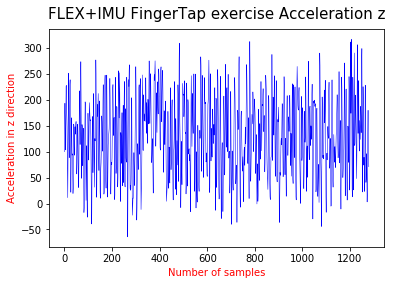

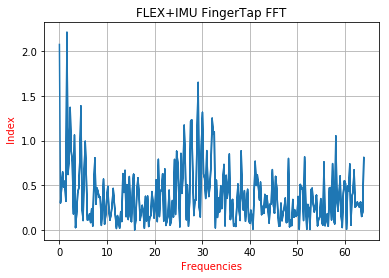

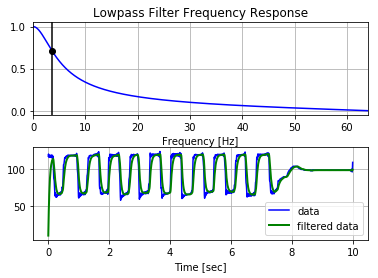

In [122]:
if __name__== "__main__":
    main()